## Spot Price Prediction for Region: us-east-1 and OS: LINUX/UNIX 

#### Best Model: Random Forest Regressor from PyCaret: R2 score: 0.9541, Mean Absolute Percentage Error: 0.0131, CV = 3

####  Prediction includes all 389 instances


**Author: Sumaia Parveen Shupti**

Created on: 05/06/2021

Updated on: 05/18/2021

In [ ]:
#!pip install pycaret

### Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
from datetime import datetime, timedelta
from datetime import date
import holidays

import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output
import itertools
import matplotlib
plt.style.use('seaborn-paper')
matplotlib.rcParams['axes.labelsize'] = 12
matplotlib.rcParams['xtick.labelsize'] = 11
matplotlib.rcParams['ytick.labelsize'] = 11
matplotlib.rcParams['text.color'] = 'k'
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams['lines.linewidth'] = 2

from sklearn.preprocessing import MinMaxScaler
from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

### Train Set

In [2]:
train = pd.read_csv('../input/train-test-set/train_test_train.csv')
train['Timestamp'] = pd.to_datetime(train['Timestamp'], format = '%Y-%m-%d %H:%M:%S.%f')
print (train.shape)
train.head()

(2289706, 5)


,AvailabilityZone,InstanceType,Timestamp,Timedel,SpotPrice
0,0,0,2021-02-16 00:00:00+00:00,684.0,0.0671
1,0,0,2021-02-16 01:00:00+00:00,720.0,0.0671
2,0,0,2021-02-16 02:00:00+00:00,756.0,0.0671
3,0,0,2021-02-16 03:00:00+00:00,792.0,0.0671
4,0,0,2021-02-16 04:00:00+00:00,828.0,0.0671


### Test Set

In [3]:
test = pd.read_csv('../input/train-test-set/train_test_test.csv')
test['Timestamp'] = pd.to_datetime(test['Timestamp'], format = '%Y-%m-%d %H:%M:%S.%f')
print (test.shape)
test.head()

(304915, 5)


,AvailabilityZone,InstanceType,Timestamp,Timedel,SpotPrice
0,0,0,2021-04-10 00:00:00+00:00,46476.0,0.0671
1,0,0,2021-04-10 01:00:00+00:00,46512.0,0.0671
2,0,0,2021-04-10 02:00:00+00:00,46548.0,0.0671
3,0,0,2021-04-10 03:00:00+00:00,46584.0,0.0671
4,0,0,2021-04-10 04:00:00+00:00,46620.0,0.0671


### Feature Engineering

In [4]:
def feat_eng(df):
    
    df['Day'] = df['Timestamp'].dt.day
    df['Hour'] = df['Timestamp'].dt.hour

    df['Weekend_(y/n)'] = ((df['Timestamp'].dt.dayofweek) // 5 == 1).astype(float)
    df['DayofYear'] = df['Timestamp'].dt.dayofyear

    df.drop('Timestamp', axis = 1, inplace = True)
    df = df.reset_index(drop = True)
    print (df.shape)
    
    return df

In [5]:
train = feat_eng(train)
train.head()

(2289706, 8)


,AvailabilityZone,InstanceType,Timedel,SpotPrice,Day,Hour,Weekend_(y/n),DayofYear
0,0,0,684.0,0.0671,16,0,0.0,47
1,0,0,720.0,0.0671,16,1,0.0,47
2,0,0,756.0,0.0671,16,2,0.0,47
3,0,0,792.0,0.0671,16,3,0.0,47
4,0,0,828.0,0.0671,16,4,0.0,47


In [6]:
test = feat_eng(test)
test.head()

(304915, 8)


,AvailabilityZone,InstanceType,Timedel,SpotPrice,Day,Hour,Weekend_(y/n),DayofYear
0,0,0,46476.0,0.0671,10,0,1.0,100
1,0,0,46512.0,0.0671,10,1,1.0,100
2,0,0,46548.0,0.0671,10,2,1.0,100
3,0,0,46584.0,0.0671,10,3,1.0,100
4,0,0,46620.0,0.0671,10,4,1.0,100


### Splitting into Features and Target

In [7]:
# Split train data to X and y
X_train = train.drop('SpotPrice', axis = 1)
y_train = train.loc[:,['SpotPrice']]
# Split test data to X and y
X_test = test.drop('SpotPrice', axis = 1)
y_test = test.loc[:,['SpotPrice']]

### Data Standardization

In [8]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Setting up Environment in PyCaret

In [9]:
%%time 

# import the regression module
from pycaret.regression import *

# initialize setup
s = setup(data = train, test_data = test, target = 'SpotPrice', fold_strategy = 'timeseries', numeric_features = ['Timedel', 'DayofYear'], \
          fold = 5, transform_target = True, session_id = 123)

,Description,Value
0,session_id,123
1,Target,SpotPrice
2,Original Data,"(2289706, 8)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2289706, 11)"


CPU times: user 39.2 s, sys: 2.02 s, total: 41.2 s
Wall time: 43 s


### Comparing All Models

In [10]:
%%time 

best = compare_models()
best

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,0.1613,0.3187,0.5238,0.7593,0.1524,0.3365,48.4360
rf,Random Forest Regressor,0.1122,0.3256,0.5203,0.7530,0.1471,0.2262,99.9280
dt,Decision Tree Regressor,0.1153,0.3364,0.5349,0.7421,0.1514,0.2284,3.2620
et,Extra Trees Regressor,0.2247,0.5100,0.6949,0.5626,0.2287,0.6412,48.1600
knn,K Neighbors Regressor,0.2841,0.5506,0.7158,0.5572,0.2326,1.0618,8.7520
lightgbm,Light Gradient Boosting Machine,0.3584,0.6532,0.7995,0.4398,0.2981,1.1343,5.8020
catboost,CatBoost Regressor,0.3272,0.6586,0.8040,0.4282,0.2879,1.7966,75.7060
gbr,Gradient Boosting Regressor,0.4807,0.9042,0.9411,0.2264,0.3510,1.7933,41.9940
ada,AdaBoost Regressor,0.5530,1.1006,1.0346,0.0691,0.3950,4.0110,35.2600
huber,Huber Regressor,0.6077,1.2900,1.1281,-0.1195,0.4441,8.6432,6.6140


CPU times: user 5min 7s, sys: 2.83 s, total: 5min 9s
Wall time: 33min 28s


PowerTransformedTargetRegressor(base_score=None, booster='gbtree',
                                colsample_bylevel=None, colsample_bynode=None,
                                colsample_bytree=None, gamma=None, gpu_id=None,
                                importance_type='gain',
                                interaction_constraints=None,
                                learning_rate=None, max_delta_step=None,
                                max_depth=None, min_child_weight=None,
                                missing=nan, monotone_constraints=None,
                                n_estimators=100, n_jobs=-1,
                                nu...
                                                       missing=nan,
                                                       monotone_constraints=None,
                                                       n_estimators=100,
                                                       n_jobs=-1,
                                                    

## Building Random Forest

In [11]:
%%time
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2750,0.9356,0.9672,0.4762,0.3378,0.8329
1,0.0474,0.0864,0.2939,0.9127,0.0743,0.0559
2,0.0781,0.2017,0.4491,0.7744,0.1097,0.0741
3,0.0732,0.1487,0.3857,0.8785,0.0970,0.0707
4,0.0874,0.2558,0.5058,0.7231,0.1166,0.0974
Mean,0.1122,0.3256,0.5203,0.7530,0.1471,0.2262
SD,0.0824,0.3101,0.2343,0.1544,0.0964,0.3037


CPU times: user 14min 39s, sys: 2.28 s, total: 14min 42s
Wall time: 12min 28s


In [20]:
prediction_holdout = predict_model(rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.0169,0.0567,0.2382,0.9541,0.0331,0.0131


### Prediction Error Plot

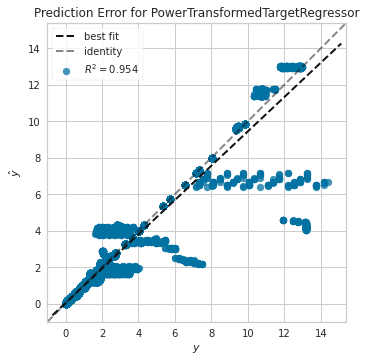

In [27]:
plot_model(rf, plot = 'error')

### Residual Plot

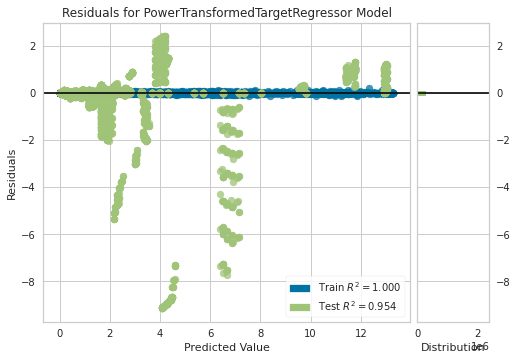

In [28]:
plot_model(rf)

### Predict on test / hold-out Sample

In [21]:
predictions = predict_model(rf, data = test)

In [22]:
predictions = predictions[['AvailabilityZone', 'InstanceType', 'Timedel', 'Day',
       'Hour', 'Weekend_(y/n)', 'DayofYear', 'SpotPrice', 'Label']]
predictions

,AvailabilityZone,InstanceType,Timedel,Day,Hour,Weekend_(y/n),DayofYear,SpotPrice,Label
0,0,0,46476.0,10,0,1.0,100,0.0671,0.0671
1,0,0,46512.0,10,1,1.0,100,0.0671,0.0671
2,0,0,46548.0,10,2,1.0,100,0.0671,0.0671
3,0,0,46584.0,10,3,1.0,100,0.0671,0.0671
4,0,0,46620.0,10,4,1.0,100,0.0671,0.0671
...,...,...,...,...,...,...,...,...,...
304910,5,388,52272.0,16,17,0.0,106,0.1116,0.1116
304911,5,388,52308.0,16,18,0.0,106,0.1116,0.1116
304912,5,388,52344.0,16,19,0.0,106,0.1116,0.1116
304913,5,388,52380.0,16,20,0.0,106,0.1116,0.1116


### Plot Performnace 

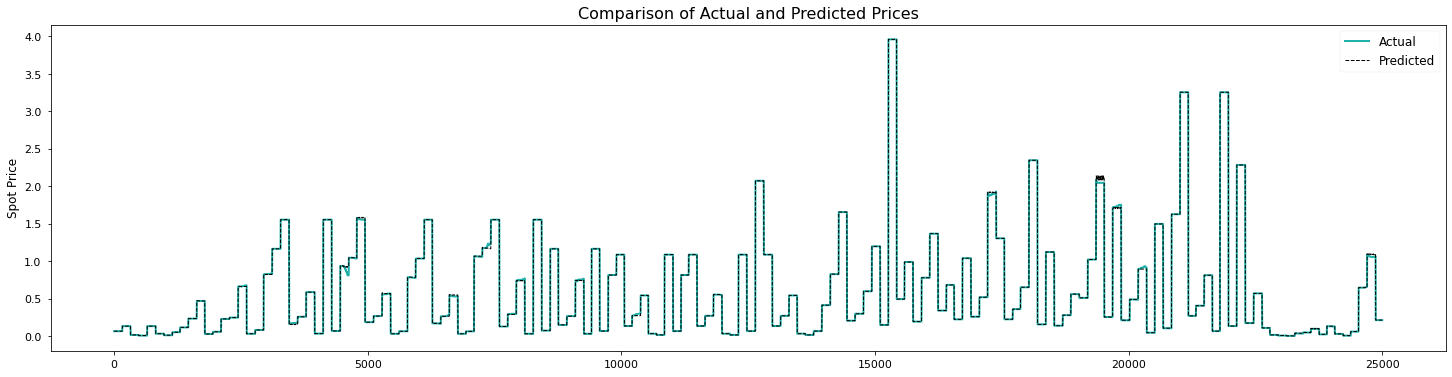

In [23]:
plt.rcParams["figure.figsize"] = [25, 6]

predictions.SpotPrice[:25000].plot(linewidth = 2, label = 'Actual', color = 'lightseagreen')
predictions.Label[:25000].plot(linewidth = 1, label = 'Predicted', color = 'black', linestyle = '--')
plt.legend(fontsize = 'large')
plt.ylabel('Spot Price')
plt.title('Comparison of Actual and Predicted Prices', fontsize = 16)
plt.show()

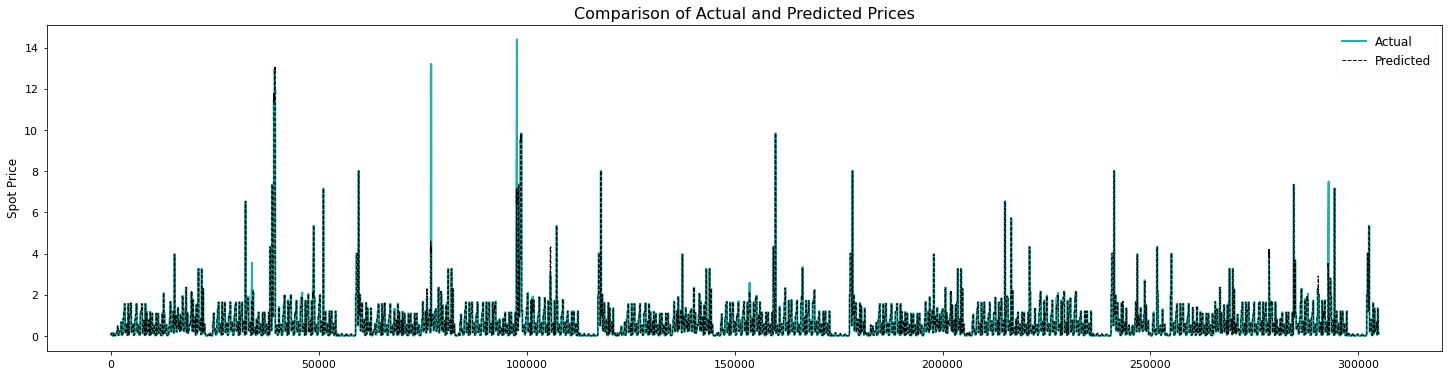

In [25]:
plt.rcParams["figure.figsize"] = [25, 6]

predictions.SpotPrice.plot(linewidth = 2, label = 'Actual', color = 'lightseagreen')
predictions.Label.plot(linewidth = 1, label = 'Predicted', color = 'black', linestyle = '--')
plt.legend(fontsize = 'large')
plt.ylabel('Spot Price')
plt.title('Comparison of Actual and Predicted Prices', fontsize = 16)
plt.show()

### Evaluation Scores

In [26]:
# Define a function to calculate MAE and RMSE
def evaluate_prediction(predictions, actual, model_name):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true))*100

    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    mape = mean_absolute_percentage_error(actual, predictions)
    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('Mean Absolute Percentage Error: {:.4f}'.format(mape))
    print('')
    
evaluate_prediction(predictions.Label, predictions.SpotPrice, 'Random Forest Untuned')

Random Forest Untuned:
Mean Absolute Error: 0.0169
Root Mean Square Error: 0.2382
Mean Absolute Percentage Error: 1.3099

